# Lab 3 — Building Visualizations with Python Libraries

This notebook contains solutions (code + short interpretations) for Sections A–F using the provided datasets.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

sales_fp = r"c:\Users\Priyanshu\Desktop\Data\Lab3\sales_data.csv"
students_fp = r"c:\Users\Priyanshu\Desktop\Data\Lab3\students_performance.csv"
country_fp = r"c:\Users\Priyanshu\Desktop\Data\Lab3\country_data.csv"

sales = pd.read_csv(sales_fp)
students = pd.read_csv(students_fp)
country = pd.read_csv(country_fp)

print("sales:\n", sales.head(), sep='')
print('\nstudents:\n', students.head(), sep='')
print('\ncountry:\n', country.head(), sep='')

sales:
  Month Region  Sales  Profit  Customers
0   Jan  North  12000    2300        120
1   Feb  North  15000    3000        140
2   Mar  North  18000    3400        155
3   Jan  South  10000    1800        100
4   Feb  South  13000    2500        125

students:
   Gender Class  Math_Score  Reading_Score  Writing_Score  Study_Hours
0  Female     A          88             92             91          4.0
1    Male     A          78             70             72          2.5
2  Female     B          95             96             94          5.0
3    Male     B          82             78             80          3.5
4  Female     C          72             75             70          2.0

country:
  Country  GDP_per_capita  Internet_Users  Literacy_Rate  Happiness_Index
0   India            2200              55             74              4.0
1     USA           65000              90             99              7.2
2   Japan           40000              88             99              6.0
3  B

## Section A — Matplotlib Basics (Line, Bar, Scatter)
Dataset: `sales_data.csv`

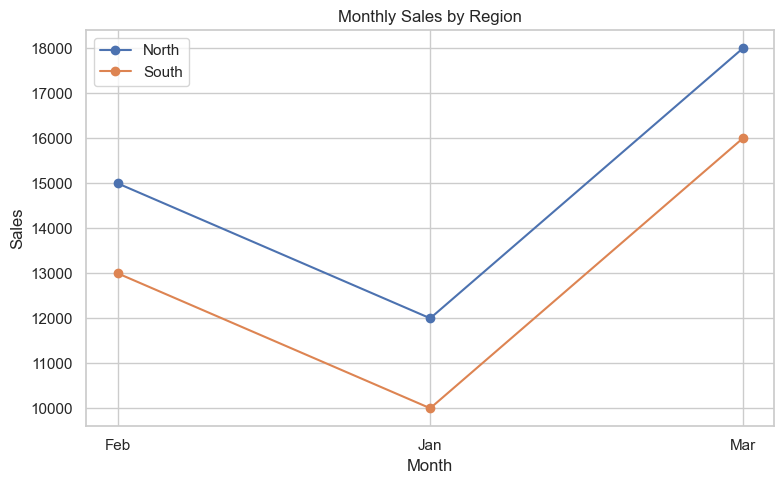

In [2]:
plt.figure(figsize=(8,5))
for region, grp in sales.groupby('Region'):
    grp_sorted = grp.sort_values('Month')
    plt.plot(grp_sorted['Month'], grp_sorted['Sales'], marker='o', label=region)
plt.title('Monthly Sales by Region')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

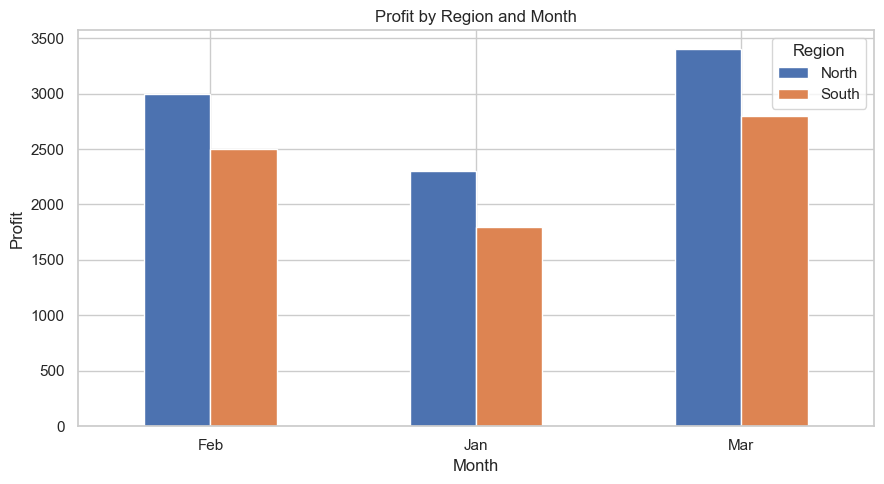

In [3]:
pivot_profit = sales.pivot(index='Month', columns='Region', values='Profit')
ax = pivot_profit.plot(kind='bar', figsize=(9,5))
ax.set_title('Profit by Region and Month')
ax.set_xlabel('Month')
ax.set_ylabel('Profit')
plt.xticks(rotation=0)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

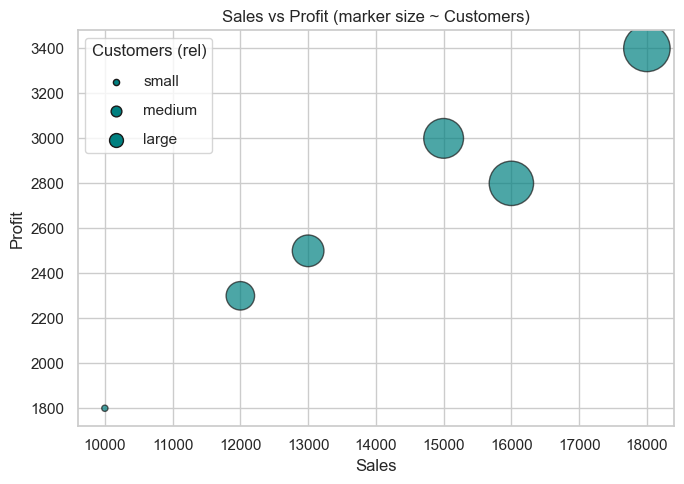

In [4]:
plt.figure(figsize=(7,5))
sizes = (sales['Customers'] - sales['Customers'].min() + 1) * 20  # scale sizes
plt.scatter(sales['Sales'], sales['Profit'], s=sizes, alpha=0.7, c='teal', edgecolor='k')
plt.title('Sales vs Profit (marker size ~ Customers)')
plt.xlabel('Sales')
plt.ylabel('Profit')
for s, lab in zip([20, 60, 100], ['small', 'medium', 'large']):
    plt.scatter([], [], s=s, label=lab, color='teal', edgecolor='k')
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Customers (rel)')
plt.tight_layout()
plt.show()

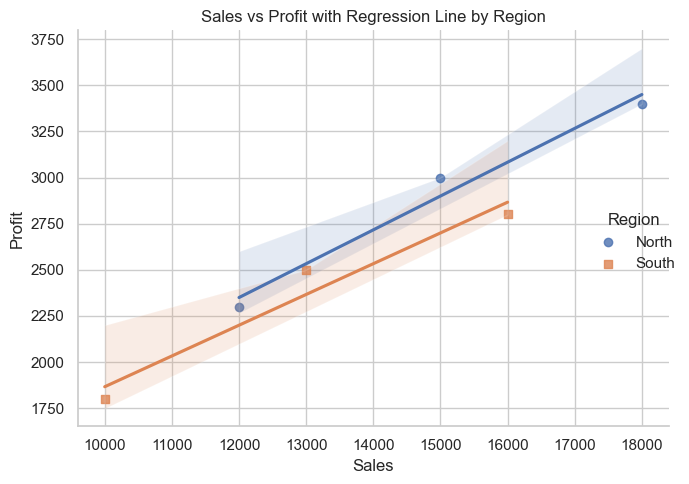

In [5]:
# A4: Scatter plot with regression line for Sales vs Profit per region using seaborn.
import warnings
warnings.filterwarnings('ignore')

sns.lmplot(data=sales, x='Sales', y='Profit', hue='Region', markers=['o','s'], height=5, aspect=1.2)
plt.title('Sales vs Profit with Regression Line by Region')
plt.tight_layout()
plt.show()

A4 Interpretation: The regression lines per region show the relationship between Sales and Profit. If slopes are positive, higher sales are associated with higher profit. Differences in slope/intercept across regions indicate regional differences in profitability per sales unit.

## Section B — Seaborn Basics (Statistical Visualizations & Customization)
Dataset: `students_performance.csv`

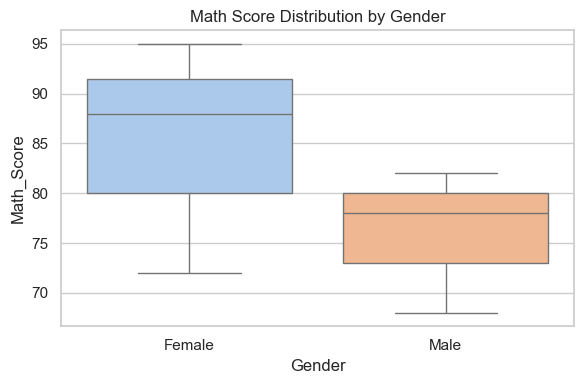

In [6]:
# B1: Boxplot showing Math_Score distribution by Gender
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Math_Score', data=students, palette='pastel')
plt.title('Math Score Distribution by Gender')
plt.tight_layout()
plt.show()

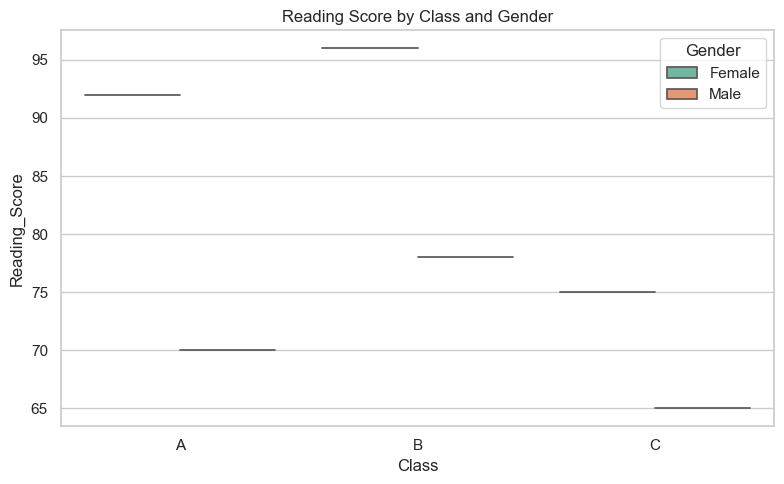

In [7]:
# B2: Violin plot comparing Reading_Score across Class groups, colored by Gender
plt.figure(figsize=(8,5))
sns.violinplot(x='Class', y='Reading_Score', hue='Gender', data=students, split=True, palette='Set2')
plt.title('Reading Score by Class and Gender')
plt.tight_layout()
plt.show()

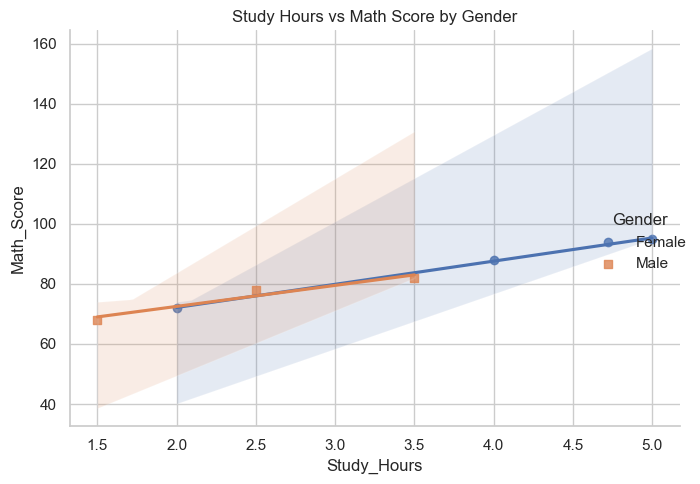

In [8]:
# B3: Scatter plot of Study_Hours vs Math_Score, with regression line and hue='Gender'
sns.lmplot(data=students, x='Study_Hours', y='Math_Score', hue='Gender', height=5, aspect=1.2, markers=['o','s'])
plt.title('Study Hours vs Math Score by Gender')
plt.tight_layout()
plt.show()

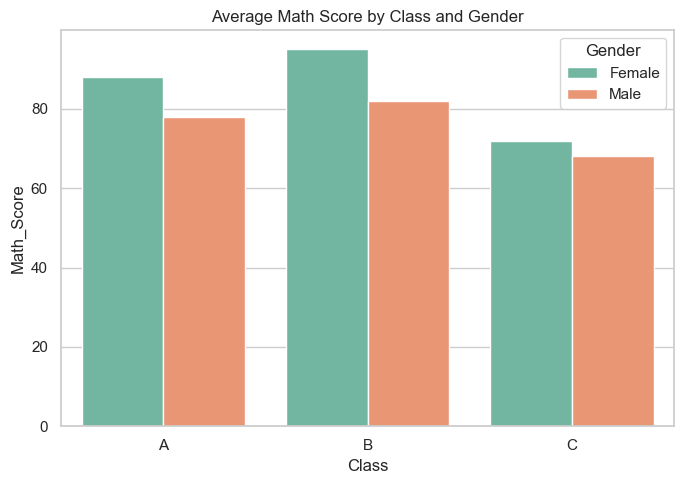

In [9]:
# B4: Grouped bar plot showing average Math_Score by Class and Gender, using palette='Set2'.
avg = students.groupby(['Class','Gender'])['Math_Score'].mean().reset_index()
plt.figure(figsize=(7,5))
sns.barplot(x='Class', y='Math_Score', hue='Gender', data=avg, palette='Set2')
plt.title('Average Math Score by Class and Gender')
plt.tight_layout()
plt.show()

B5 Interpretation: Compare the heights in the grouped bar plot and central tendencies in the boxplots/violins to determine which gender performs better across classes. Look for consistently higher means/medians.

## Section C — Advanced Statistical Visualizations (Regression, Correlation, Distribution)
Dataset: `mpg` (seaborn built-in)

In [10]:
mpg = sns.load_dataset('mpg').dropna()
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


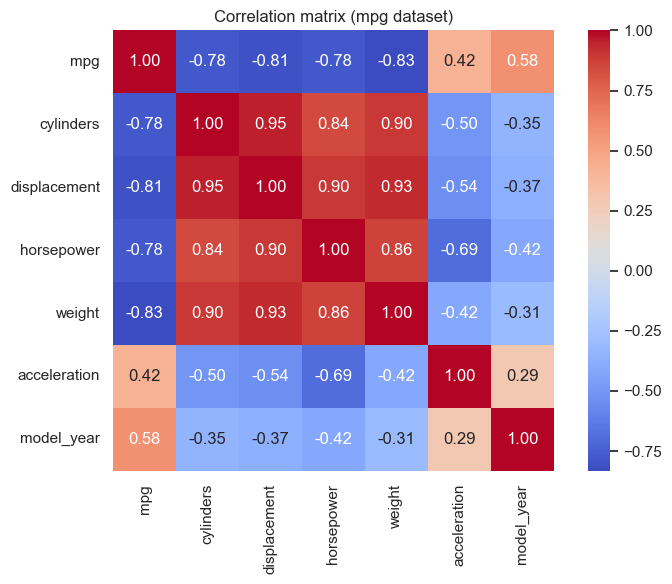

In [11]:
# C1: Correlation heatmap for the mpg dataset (numeric columns)
num_cols = mpg.select_dtypes(include=[np.number])
plt.figure(figsize=(8,6))
corr = num_cols.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation matrix (mpg dataset)')
plt.tight_layout()
plt.show()

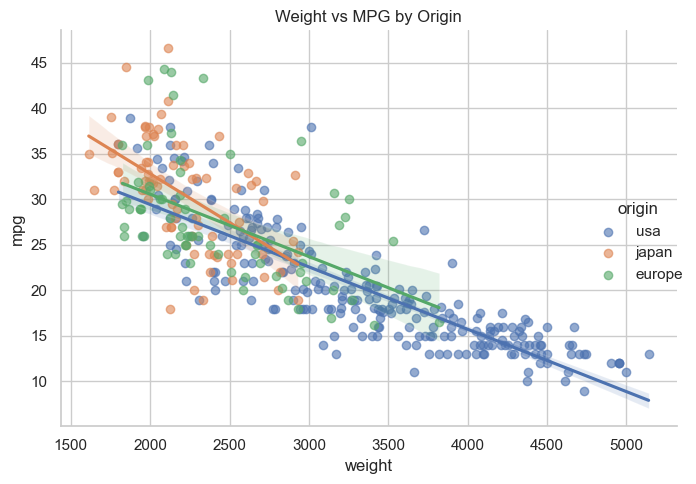

In [12]:
# C2: Regression line between weight and mpg with hue='origin'
sns.lmplot(data=mpg, x='weight', y='mpg', hue='origin', height=5, aspect=1.2, scatter_kws={'alpha':0.6})
plt.title('Weight vs MPG by Origin')
plt.tight_layout()
plt.show()

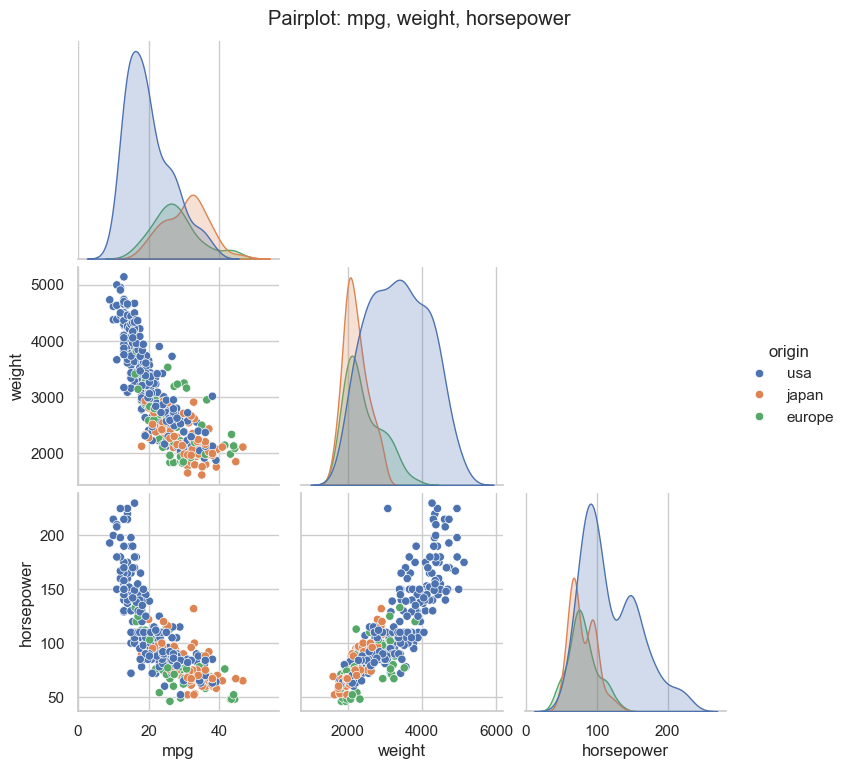

In [13]:
# C3: Pairplot for mpg, weight, and horsepower
sns.pairplot(mpg[['mpg','weight','horsepower','origin']], hue='origin', corner=True)
plt.suptitle('Pairplot: mpg, weight, horsepower', y=1.02)
plt.show()

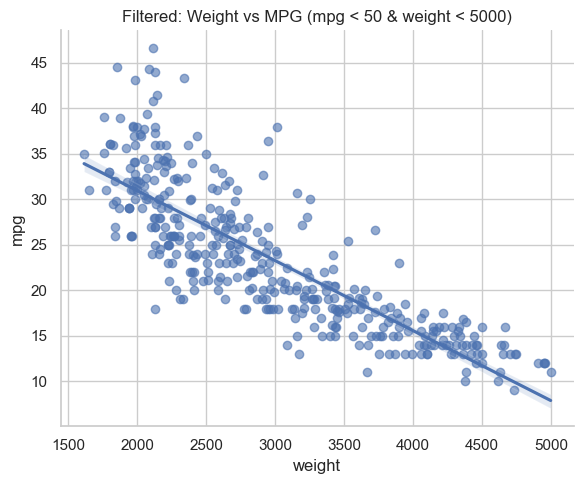

In [14]:
# C4: Filter mpg rows where mpg < 50 and weight < 5000, then lmplot for weight vs mpg
mpg_filt = mpg[(mpg['mpg'] < 50) & (mpg['weight'] < 5000)]
sns.lmplot(data=mpg_filt, x='weight', y='mpg', height=5, aspect=1.2, scatter_kws={'alpha':0.6})
plt.title('Filtered: Weight vs MPG (mpg < 50 & weight < 5000)')
plt.tight_layout()
plt.show()

C5 Interpretation: If the regression slope is negative, heavier cars tend to have lower mpg, indicating that heavier cars are less fuel efficient. Check correlation coefficients in the heatmap for confirmation.

## Section D — Encoding and Faceting (tips dataset)
Dataset: `tips` (seaborn built-in)

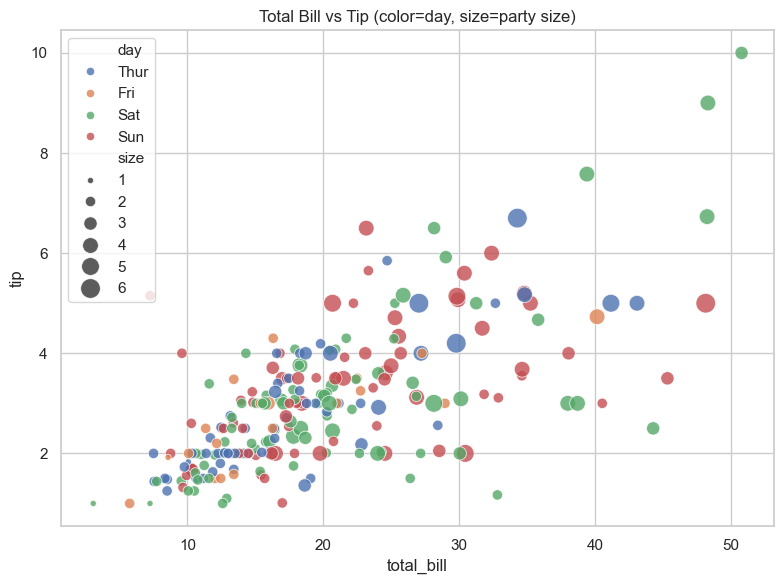

In [15]:
tips = sns.load_dataset('tips')

# D1: Scatter plot total_bill vs tip, encoding day by color and size by party size
plt.figure(figsize=(8,6))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day', size='size', sizes=(20,200), alpha=0.8)
plt.title('Total Bill vs Tip (color=day, size=party size)')
plt.tight_layout()
plt.show()

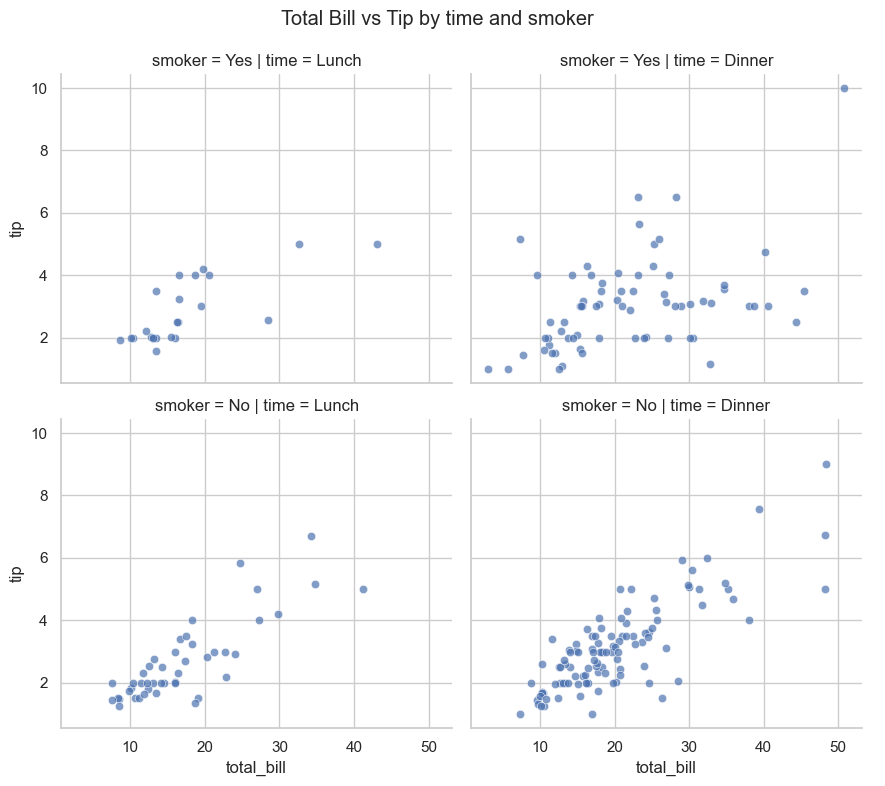

In [16]:
# D2: Use sns.FacetGrid to create scatter plots separated by time and smoker
g = sns.FacetGrid(tips, col='time', row='smoker', height=4, aspect=1.1)
g.map_dataframe(sns.scatterplot, 'total_bill', 'tip', alpha=0.7)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Total Bill vs Tip by time and smoker')
plt.show()

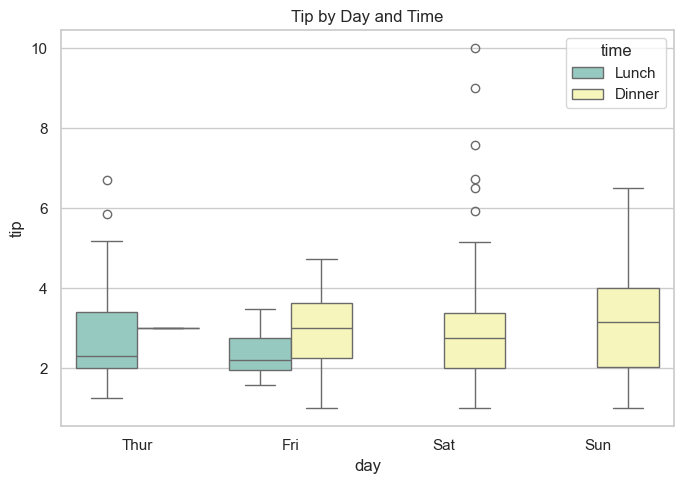

In [17]:
# D3: Boxplot of tip by day, with hue='time'
plt.figure(figsize=(7,5))
sns.boxplot(x='day', y='tip', hue='time', data=tips, palette='Set3')
plt.title('Tip by Day and Time')
plt.tight_layout()
plt.show()

D4 Interpretation: Color is typically more effective for categorical group comparisons because humans can quickly map color to category. Size encoding is useful for representing magnitude, but comparing groups by size is less precise than by color or position.

## Section E — Creating Multiple Visualizations & Critiquing Chart Choice
Dataset: `country_data.csv`

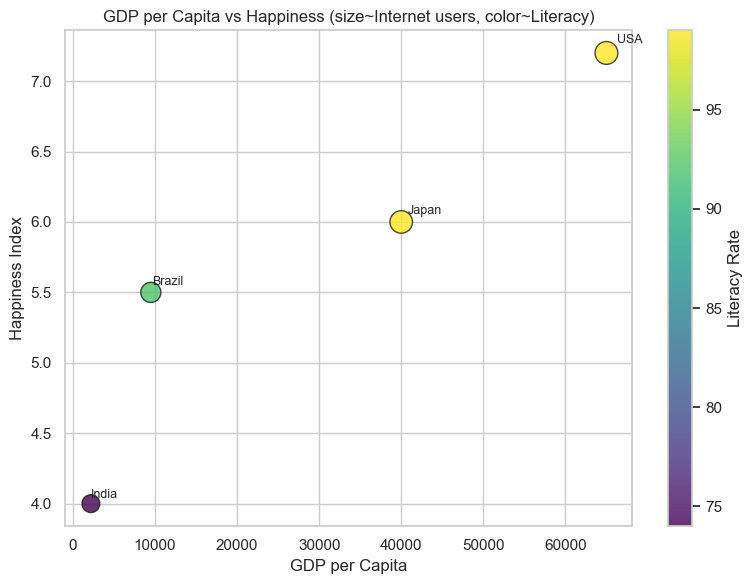

In [18]:
# E1: Scatter plot: GDP_per_capita vs Happiness_Index, size=Internet_Users, color=Literacy_Rate
plt.figure(figsize=(8,6))
s = plt.scatter(country['GDP_per_capita'], country['Happiness_Index'],
                s=country['Internet_Users']*3, c=country['Literacy_Rate'], cmap='viridis', alpha=0.8, edgecolor='k')
plt.colorbar(s, label='Literacy Rate')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Index')
plt.title('GDP per Capita vs Happiness (size~Internet users, color~Literacy)')
for i, row in country.iterrows():
    plt.text(row['GDP_per_capita']*1.02, row['Happiness_Index']*1.01, row['Country'], fontsize=9)
plt.tight_layout()
plt.show()

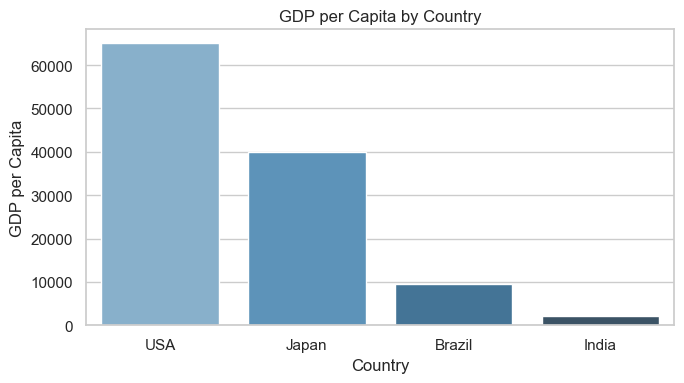

In [19]:
# E2: Bar chart of GDP_per_capita by Country, sorted by value
country_sorted = country.sort_values('GDP_per_capita', ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x='Country', y='GDP_per_capita', data=country_sorted, palette='Blues_d')
plt.title('GDP per Capita by Country')
plt.ylabel('GDP per Capita')
plt.tight_layout()
plt.show()

E3 Observations & Critique:
- From the scatter, GDP per capita appears to have a positive association with Happiness_Index in this small sample (e.g., USA and Japan high GDP and higher happiness).
- Internet_Users (size) also tends to be higher for countries with higher happiness, but GDP shows a clearer monotonic relationship here.

E4 Suggested improvements for non-technical audiences:
- Add clear axis labels and short captions.
- Use annotations or a small legend explaining bubble size mapping.
- Limit color scale and use sequential colormap for literacy to avoid confusion.
- Consider plotting a simple ranked list or slope chart for clarity.

## Section F — Mini Project (Comprehensive Practical)
Dataset chosen: `students_performance.csv`
Question: Does study hours impact Math_Score, and how does gender/class mediate this?

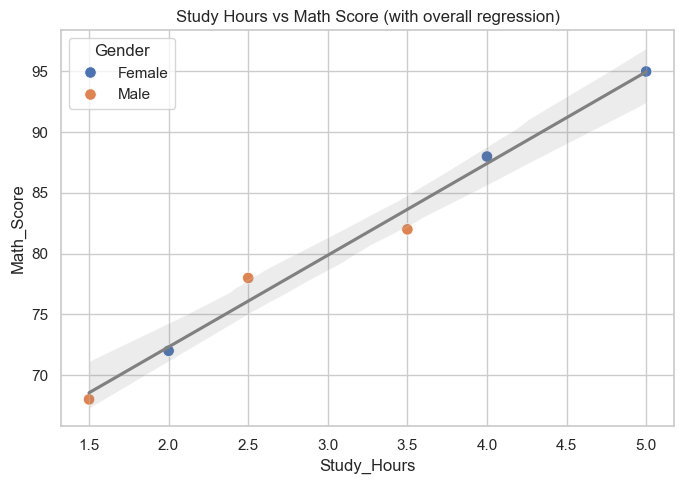

In [20]:
# F1: Scatter with regression, colored by Gender
plt.figure(figsize=(7,5))
sns.scatterplot(data=students, x='Study_Hours', y='Math_Score', hue='Gender', s=70)
sns.regplot(data=students, x='Study_Hours', y='Math_Score', scatter=False, color='gray')
plt.title('Study Hours vs Math Score (with overall regression)')
plt.tight_layout()
plt.show()

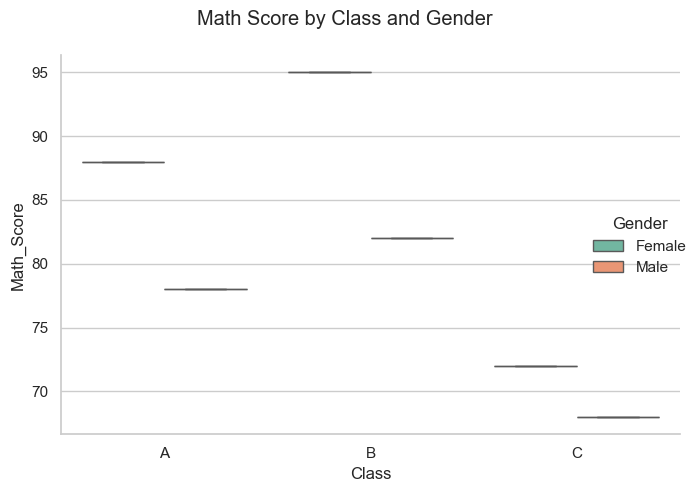

In [21]:
# F2: Boxplot of Math_Score by Class and Gender (faceted)
g = sns.catplot(data=students, x='Class', y='Math_Score', hue='Gender', kind='box', palette='Set2', height=5, aspect=1.2)
g.fig.suptitle('Math Score by Class and Gender')
plt.tight_layout()
plt.show()

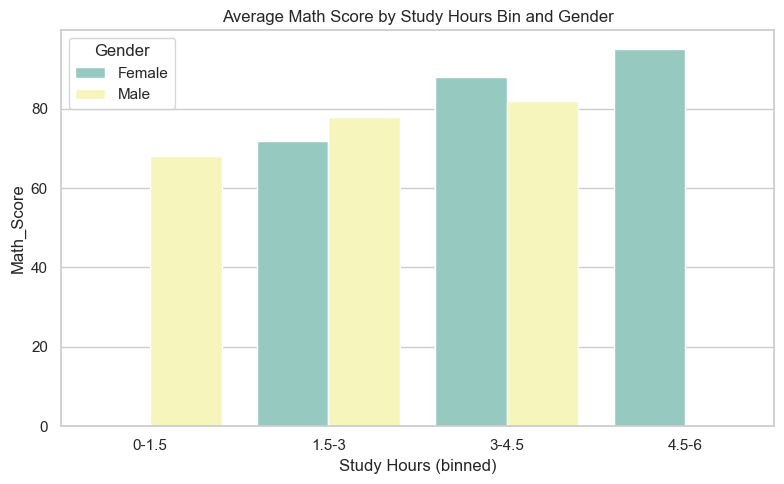

In [23]:
# F3: Bar chart of average Math_Score by Study_Hours bins and Gender
students['hours_bin'] = pd.cut(students['Study_Hours'], bins=[0,1.5,3,4.5,6], labels=['0-1.5','1.5-3','3-4.5','4.5-6'])
avg_hours_gender = students.groupby(['hours_bin','Gender'])['Math_Score'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='hours_bin', y='Math_Score', hue='Gender', data=avg_hours_gender, palette='Set3')
plt.title('Average Math Score by Study Hours Bin and Gender')
plt.xlabel('Study Hours (binned)')
plt.tight_layout()
plt.show()

F Interpretations:
- Plot 1: If the regression shows positive slope, more study hours are associated with higher Math_Score.
- Plot 2: Boxplots reveal score distributions across classes and genders — check medians and interquartile ranges.
- Plot 3: Average scores by study-hour bins demonstrate how scores increase with more study time and whether this pattern differs by gender.
